<h3 style="color:red;" > Exploratory Data Analysis <h3>
    

<h4 style="color:blue;" > Import packages <h4>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns
import statistics as st
from IPython.display import display
pd.options.display.max_columns = 100 #(to unlimit the varibles)
pd.set_option('display.max_rows', None)
import statsmodels.api as sm
from sklearn import metrics  

In [105]:
res = pd.read_csv("../Data/restaurant-revenue-prediction/train.csv")

In [106]:
res

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03-09-2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02-02-2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05-09-2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715
5,5,02-12-2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319
6,6,10-11-2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227


In [3]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [4]:
res["Open Date"] = pd.to_datetime(res['Open Date']) 

In [5]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null datetime64[ns]
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137

In [6]:
res.isnull().sum()


Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

we have found no missing values  in the dataset


In [7]:
res.head(1)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753


In [8]:
res.describe(include = "all")

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137,137,137,137,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
unique,NaN,134,34,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2000-01-07 00:00:00,İstanbul,Big Cities,FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,78,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,1996-05-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.000000,NaN,NaN,NaN,NaN,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,NaN,NaN,NaN,NaN,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06


<h5 style = "color: green;">Univariate analysis

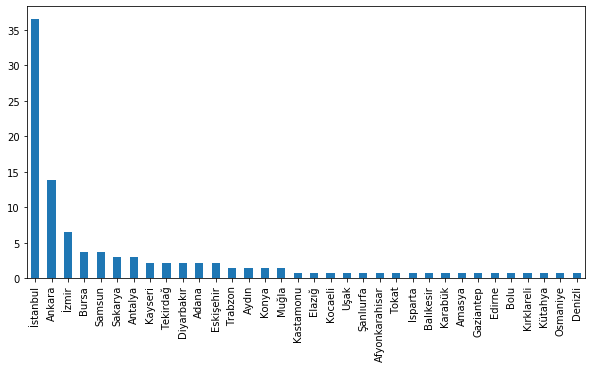

In [9]:
(res['City'].value_counts()/len(res['City'])*100).plot.bar( figsize = (10,5))


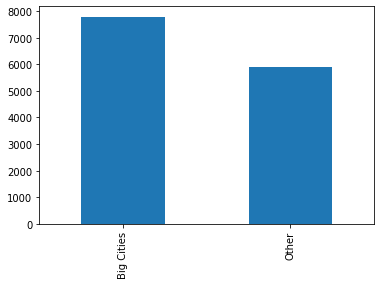

In [10]:
(res['City Group'].value_counts()/len(['City Group'])*100).plot.bar()

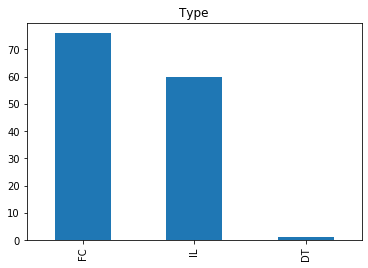

In [11]:
res['Type'].value_counts().plot.bar(title = 'Type')

In [12]:
res['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

DT is an outlier, we can eliminate it

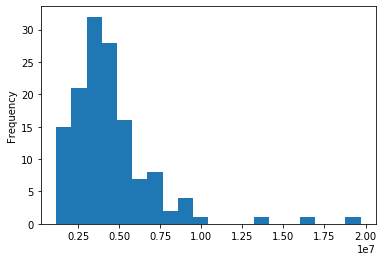

In [13]:
res['revenue'].plot.hist(bins =20)

Bi - Variate analysis


In [14]:
y= res['revenue'].sum()

No handles with labels found to put in legend.


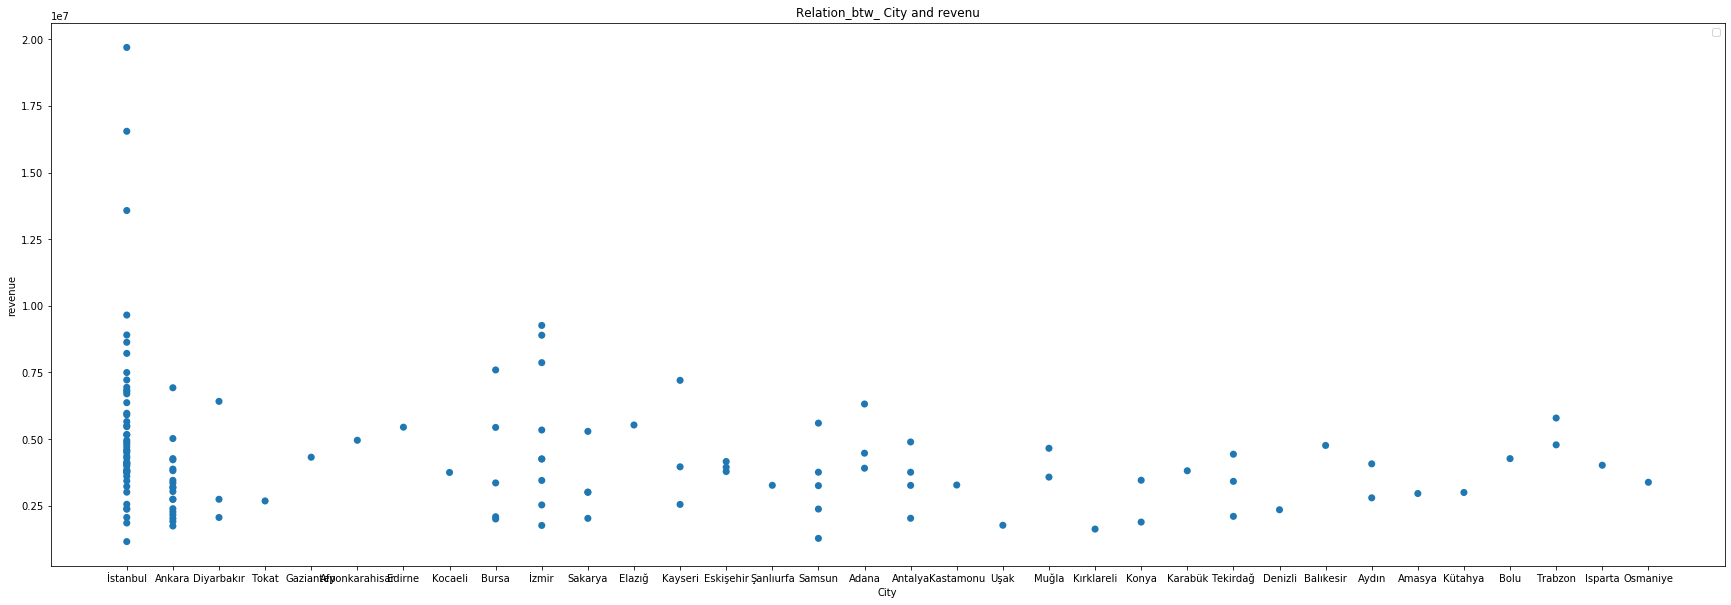

In [15]:
x = res['City']
y = res['revenue']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha=1, edgecolors='none', s=50)
plt.title('Relation_btw_ City and revenu')
plt.legend(loc=0)

plt.xlabel("City")
plt.ylabel("revenue")
plt.show()

WE see that istanbul,ankara,Bursa, izimir, Kayseri are having high revenues and we can conclude that revenues are increasing with respect to the city.

No handles with labels found to put in legend.


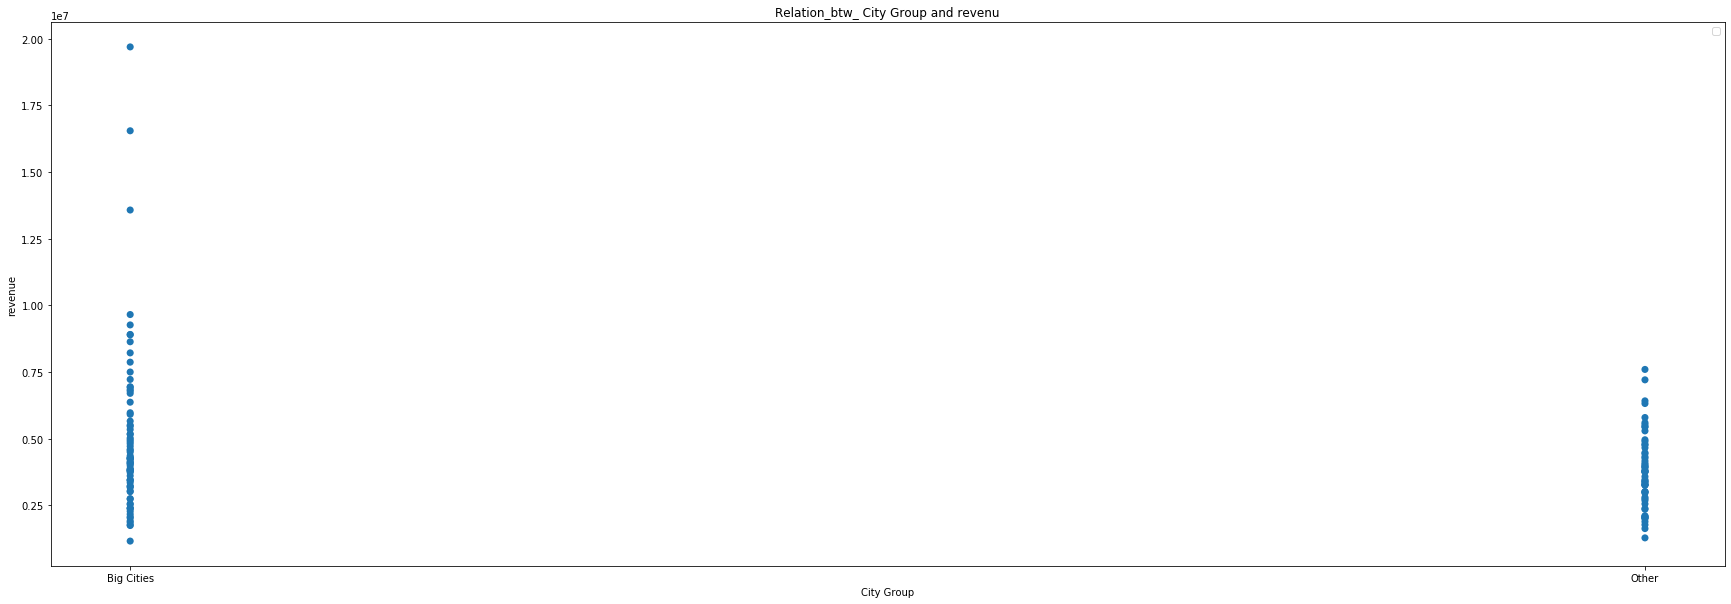

In [16]:
x = res['City Group']
y = res['revenue']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha=1, edgecolors='none', s=50)
plt.title('Relation_btw_ City Group and revenu')
plt.legend(loc=0)

plt.xlabel("City Group")
plt.ylabel("revenue")
plt.show()

Both city groups are considerable.

No handles with labels found to put in legend.


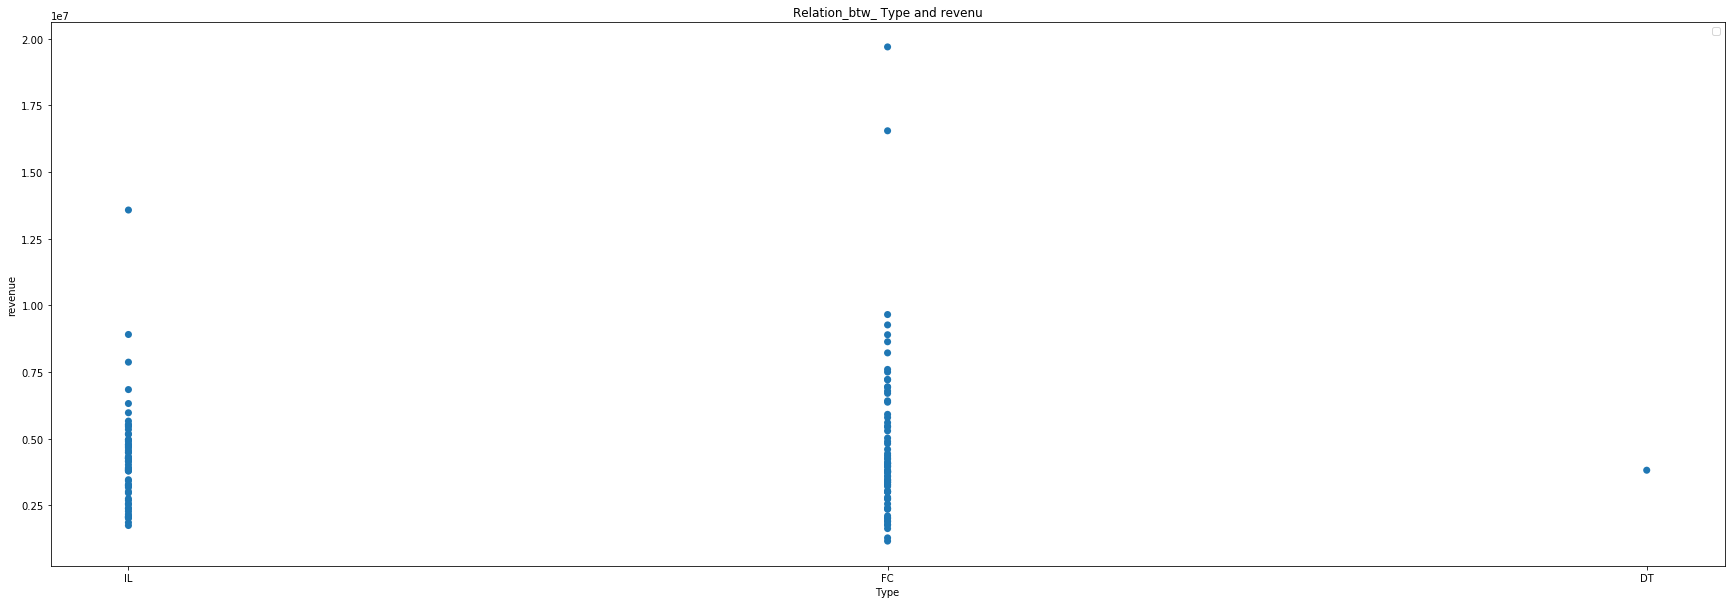

In [17]:
x = res['Type']
y = res['revenue']
plt.figure(figsize =  (30, 10))
plt.scatter(x,y, alpha=1, edgecolors='none', s=50)
plt.title('Relation_btw_ Type and revenu')
plt.legend(loc=0)

plt.xlabel("Type")
plt.ylabel("revenue")
plt.show()


For these countries -> istanbul,ankara,Bursa, izimir, Kayseri find which type of hotels are givng much revenue and with open date

In [18]:
#res[res['City'].isin( ['İstanbul','Ankara','Bursa', 'İzmir', 'Kayseri'])]

#dfObj[dfObj['Product'] == 'Apples']
#df.loc[df['Color'] == 'Green'

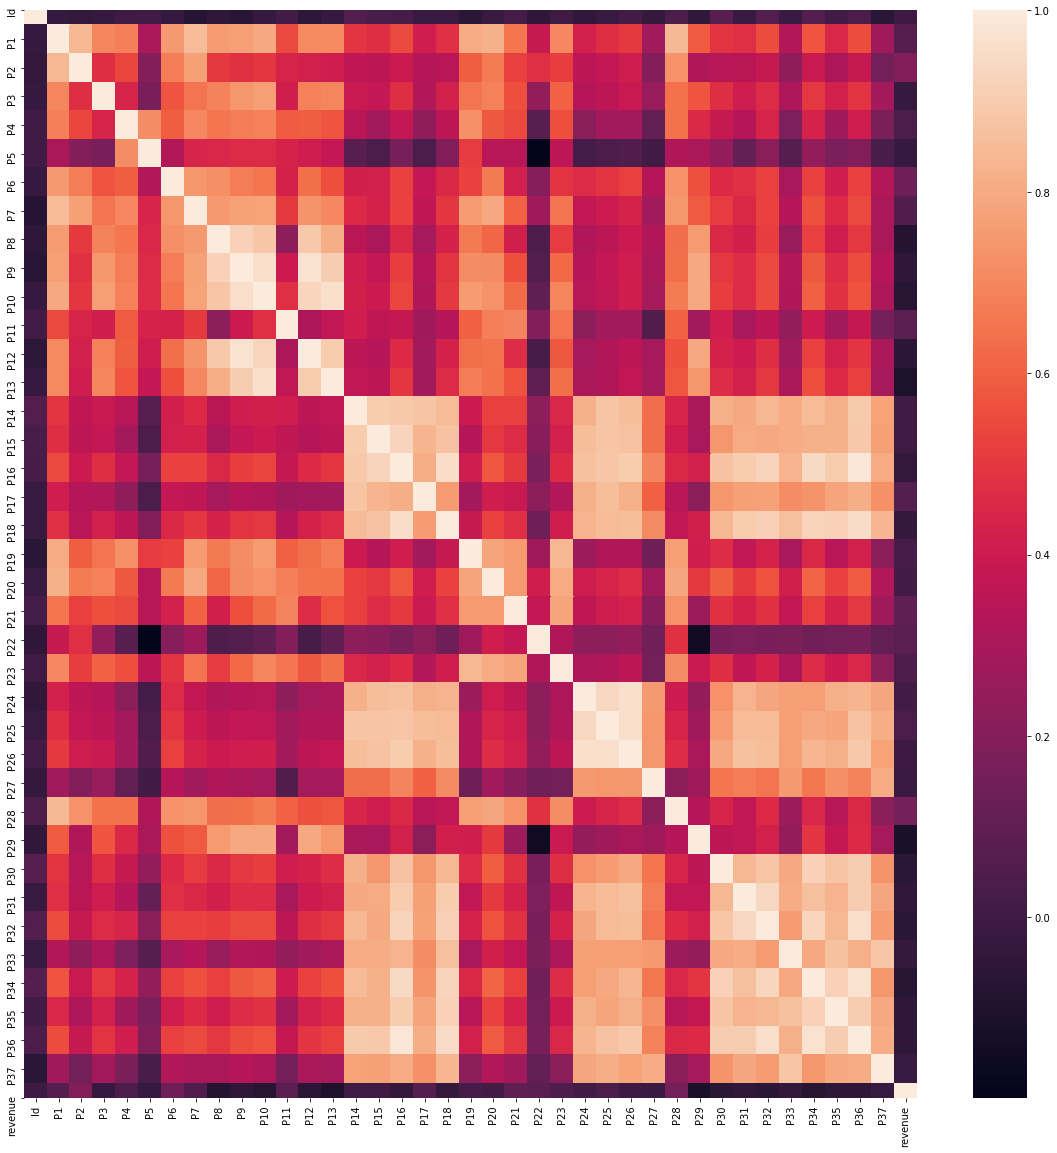

In [19]:
corr = res.corr()
plt.figure(figsize=(20,20))
sns.heatmap(res.corr())

In [20]:
corr.to_excel("../output/revenue - correlation.xlsx")

In [21]:
#res['today'] = pd.datetime.now().date() #to extract current date


In [22]:
res["today"] = pd.to_datetime('09-06-2020') #to convert object dtype into date column

In [23]:
# res['days'] = res['today'].sub(res['Open Date'], axis=0) #to subtract current date minus date time

In [24]:
#res = res.drop('days', axis = 1)

In [25]:
#res = res.drop('2020-06-06', axis = 1)

In [26]:
res['months'] = 12 * (res.today.dt.year - res['Open Date'].dt.year) + (res.today.dt.month - res['Open Date'].dt.month)

In [27]:
res = res.drop([ 'today'], axis=1)

In [28]:
#res['years'] = res['months']/12

In [29]:
#res.plot.scatter('years', 'revenue')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


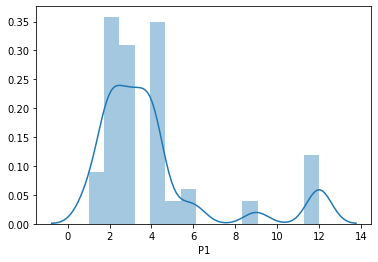

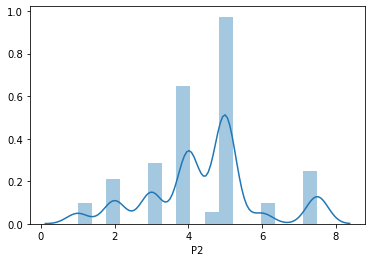

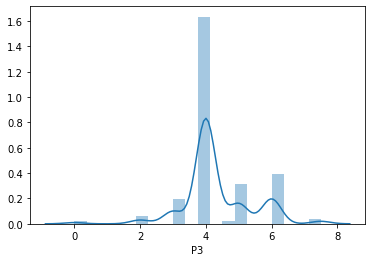

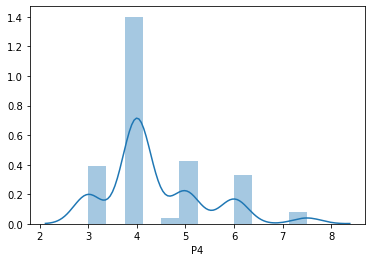

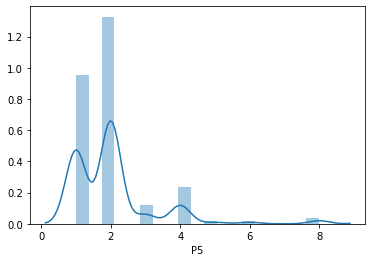

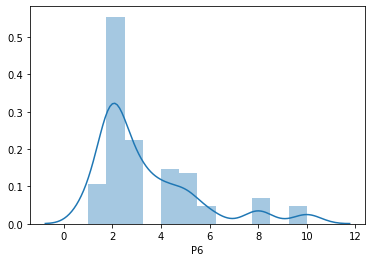

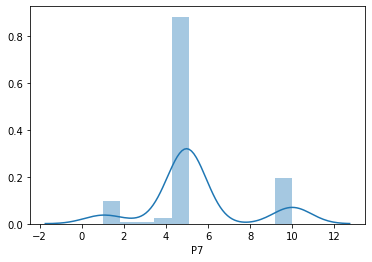

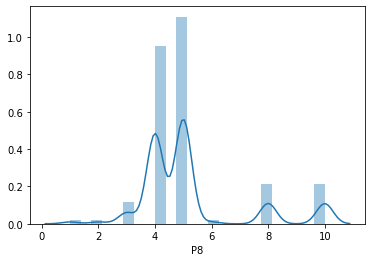

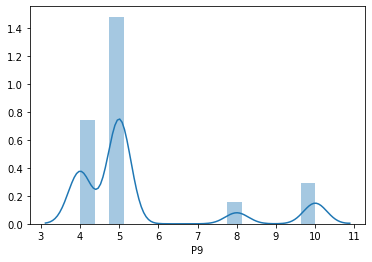

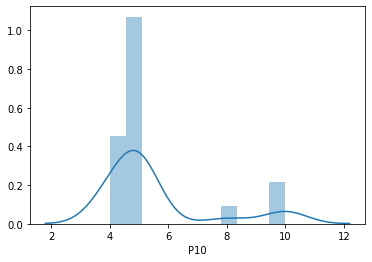

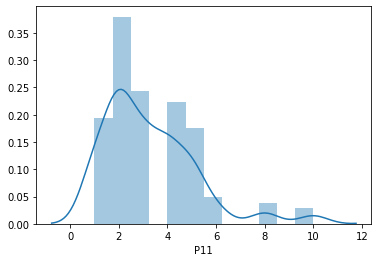

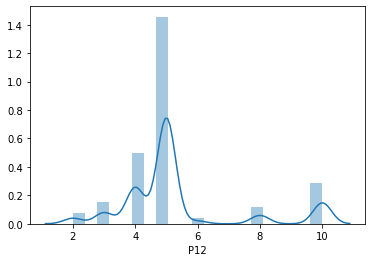

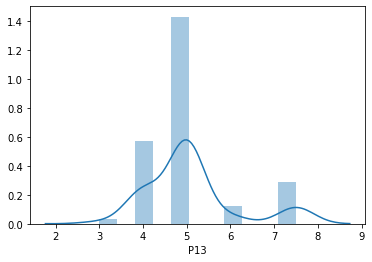

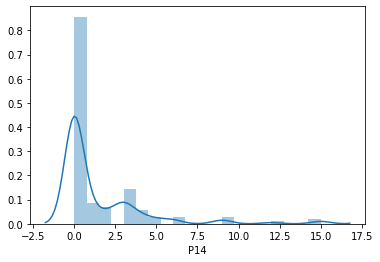

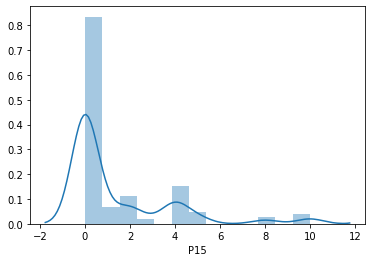

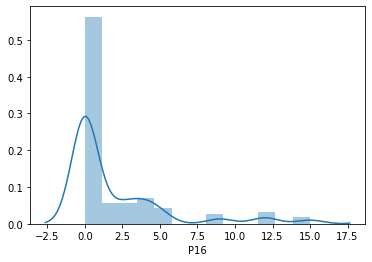

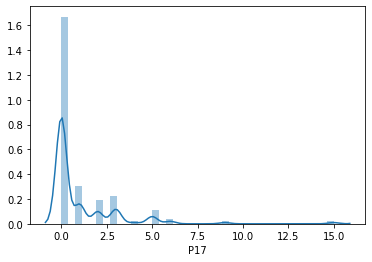

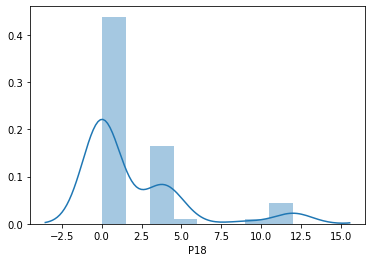

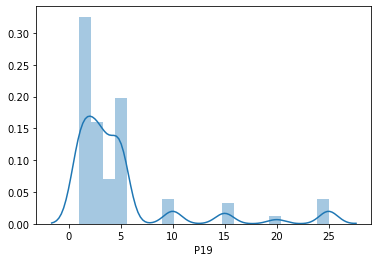

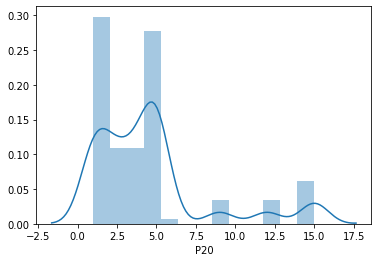

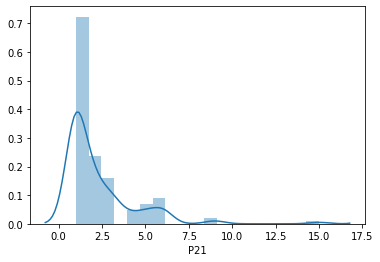

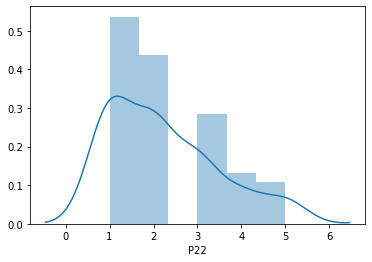

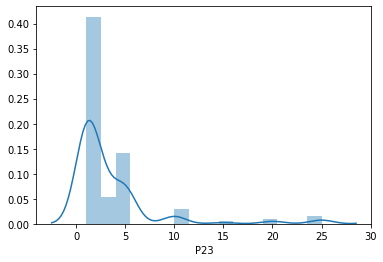

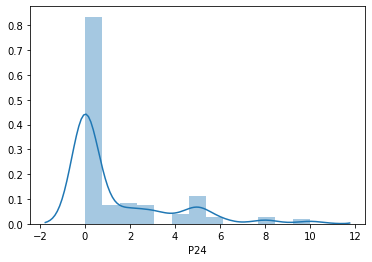

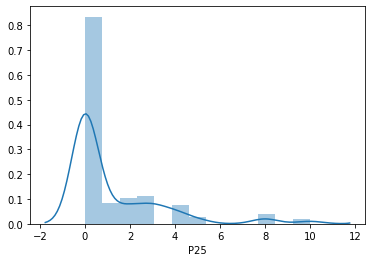

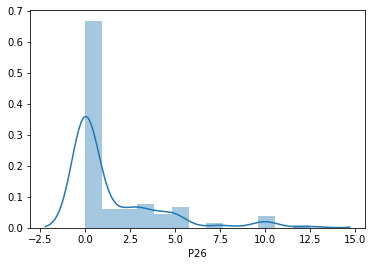

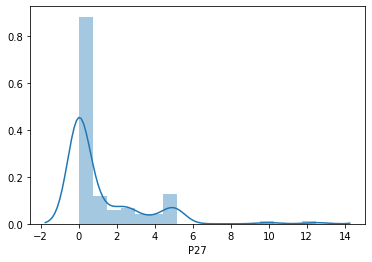

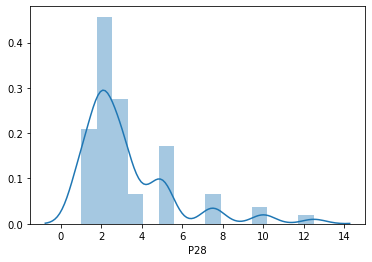

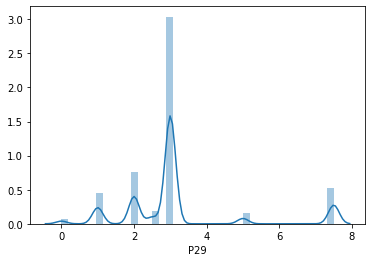

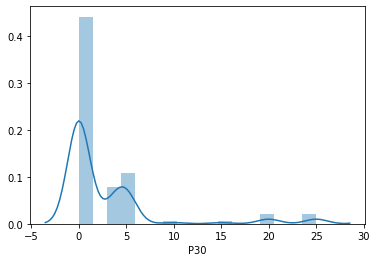

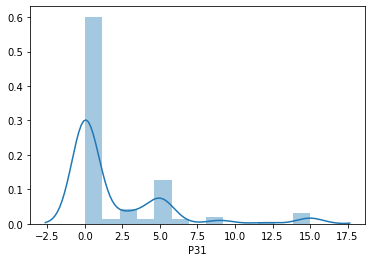

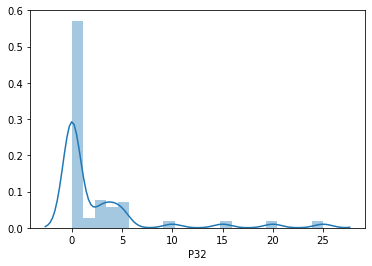

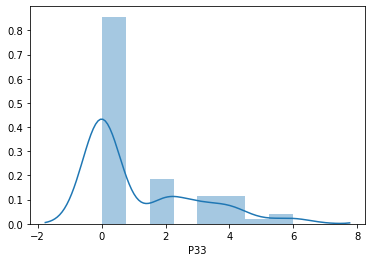

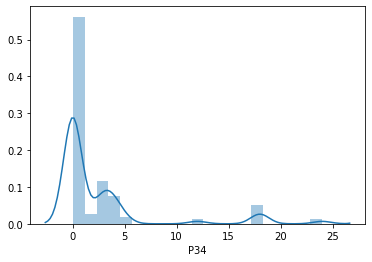

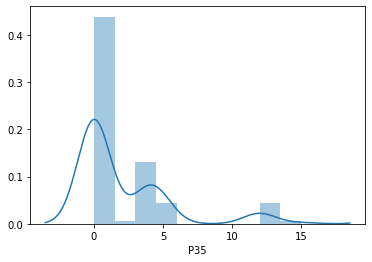

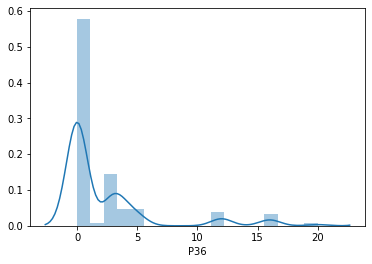

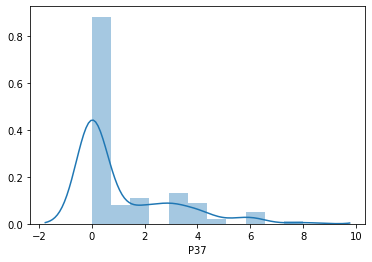

In [30]:
df_pcols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']
for i, column in enumerate(df_pcols):
    plt.figure()
    sns.distplot(res[column])
        

In [31]:
res.head(1)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,months
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753,254


In [32]:
#res = res.drop(['months'], axis= 1)

In [33]:
X= res.drop(['revenue'], axis = 1)
Y = res[['revenue']]
names  = list(X.columns)

In [34]:
inp_df = pd.DataFrame(X, columns = names)

In [35]:
dummy1 = pd.get_dummies(inp_df['City Group'])
inp_df =  pd.concat([dummy1, inp_df], axis =1 )

In [36]:
dummy2 = pd.get_dummies(inp_df['City'])
inp_df =  pd.concat([dummy2, inp_df], axis =1 )

In [37]:
dummy3 = pd.get_dummies(inp_df['Type'])
inp_df =  pd.concat([dummy3, inp_df], axis =1 )

In [38]:
inp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 82 columns):
DT                137 non-null uint8
FC                137 non-null uint8
IL                137 non-null uint8
Adana             137 non-null uint8
Afyonkarahisar    137 non-null uint8
Amasya            137 non-null uint8
Ankara            137 non-null uint8
Antalya           137 non-null uint8
Aydın             137 non-null uint8
Balıkesir         137 non-null uint8
Bolu              137 non-null uint8
Bursa             137 non-null uint8
Denizli           137 non-null uint8
Diyarbakır        137 non-null uint8
Edirne            137 non-null uint8
Elazığ            137 non-null uint8
Eskişehir         137 non-null uint8
Gaziantep         137 non-null uint8
Isparta           137 non-null uint8
Karabük           137 non-null uint8
Kastamonu         137 non-null uint8
Kayseri           137 non-null uint8
Kocaeli           137 non-null uint8
Konya             137 non-null uint8
Kütahya

In [39]:
inp_df['Open Date'] = inp_df['Open Date'].astype(np.int64)

In [40]:
#inp_df['today'] = inp_df['today'].astype(np.int64)

In [41]:
#'P1','P7','P8','P9', 'P10','P12', 'P14','P15','P16', 'P18', 'P19','P23','P25','P30','P31','P32','P33','P34','P35','P36','P37

In [42]:
inp_df = inp_df.drop(['City Group','City','Type', 'DT','Id', 'Type',],  axis = 1) 
#P1','P2','P3','P4','P5','P6','P7','P8','P9', 'P10', 'P11', 'P12', 'P13', 'P14','P15','P16', 'P17','P18', 'P19', 'P22', 'P23', 'P24','P25', 'P26', 'P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37'

In [43]:
inp_df.columns

Index(['FC', 'IL', 'Adana', 'Afyonkarahisar', 'Amasya', 'Ankara', 'Antalya',
       'Aydın', 'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır',
       'Edirne', 'Elazığ', 'Eskişehir', 'Gaziantep', 'Isparta', 'Karabük',
       'Kastamonu', 'Kayseri', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli',
       'Muğla', 'Osmaniye', 'Sakarya', 'Samsun', 'Tekirdağ', 'Tokat',
       'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa', 'Big Cities',
       'Other', 'Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28',
       'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'months'],
      dtype='object')

In [44]:
#for i in  range(0, len(names)):
#    y  = inp_df.loc[:, inp_df.columns == names[i]]
#    x  = inp_df.loc[:, inp_df.columns  != names[i]]
#    model = sm.OLS(y,x)
#    results  = model.fit()
#    rsq = results.rsquared
#    vif = round(1/(1-rsq), 2)

In [45]:
#inp_dfcorr = inp_df.corr()
#inp_dfcorr.to_excel("../output/inp_dfcorr-revenue - correlation.xlsx")

In [46]:
#inp_df_dummy['revenue'] = res['revenue']

In [47]:
import statsmodels
statsmodels.__version__

'0.12.0'

In [48]:
"""from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

inp_df_dummy = inp_df
inp_df_dummy['revenue'] = res['revenue']

inp_df_dummy

inp_df_dummy = inp_df.drop(['City_Group_Big Cities', 'Open Date'], axis = 1)

#find design matrix for linear regression model using 'rating' as response variable 
y_, X_ = dmatrices('revenue ~ {}'.format('+'.join(list(set(inp_df_dummy.columns) - set(['revenue'])))), data=inp_df_dummy, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_.values, i) for i in range(X.shape[1])]
vif['variable'] = X_.columns"""



"from patsy import dmatrices\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\ninp_df_dummy = inp_df\ninp_df_dummy['revenue'] = res['revenue']\n\ninp_df_dummy\n\ninp_df_dummy = inp_df.drop(['City_Group_Big Cities', 'Open Date'], axis = 1)\n\n#find design matrix for linear regression model using 'rating' as response variable \ny_, X_ = dmatrices('revenue ~ {}'.format('+'.join(list(set(inp_df_dummy.columns) - set(['revenue'])))), data=inp_df_dummy, return_type='dataframe')\n\n#calculate VIF for each explanatory variable\nvif = pd.DataFrame()\nvif['VIF'] = [variance_inflation_factor(X_.values, i) for i in range(X.shape[1])]\nvif['variable'] = X_.columns"

In [49]:
#vif.sort_values(['VIF'], ascending = False)

In [50]:
#from patsy import dmatrices
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#inp_df = inp_df.drop(['Big Cities', 'Open Date'], axis = 1)

#find design matrix for linear regression model using 'rating' as response variable 
#y, X = dmatrices('revenue ~FC+IL+Adana+Afyonkarahisar+Amasya+Ankara+Antalya+Aydın+Balıkesir+Bolu+Bursa+Denizli+Diyarbakır+Edirne+Elazığ+Eskişehir+Gaziantep+Isparta+Karabük+Kastamonu+Kayseri+Kocaeli+Konya+Kütahya+Kırklareli+Muğla+Osmaniye+Sakarya+Samsun+Tekirdağ+Tokat+Trabzon+Uşak+İstanbul+İzmir+Şanlıurfa+Other+P1+P2+P3+P5+P6+P7+P8+P9+P10+P12+P13+P14+P15+P16+P17+P18+P19+P20+P21+P22+P23+P24+P25+P26+P27+P28+P29+P30+P31+P32+P33+P34+P35+P36+P37+today', data=inp_df_dummy, return_type='dataframe')

#calculate VIF for each explanatory variable
#vif = pd.DataFrame()
#vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['variable'] = X.columns



In [51]:
#vif.sort_values(['VIF'], ascending = False)

In [52]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = pd.DataFrame()
#vif["features"] = inp_df.columns
#vif["vif_Factor"] = [variance_inflation_factor(inp_df.values, i) for i in range(inp_df.shape[1])]
#vif

In [53]:
inp_df.head(1)

,FC,IL,Adana,Afyonkarahisar,Amasya,Ankara,Antalya,Aydın,Balıkesir,Bolu,Bursa,Denizli,Diyarbakır,Edirne,Elazığ,Eskişehir,Gaziantep,Isparta,Karabük,Kastamonu,Kayseri,Kocaeli,Konya,Kütahya,Kırklareli,Muğla,Osmaniye,Sakarya,Samsun,Tekirdağ,Tokat,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Big Cities,Other,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,months
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,932169600000000000,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,254


In [54]:
inp_df.shape

(137, 77)

In [55]:
inp_df.shape[1]

77

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = inp_df.columns
vif["vif_Factor"] = [variance_inflation_factor(inp_df.values, i) for i in range(inp_df.shape[1])]
vif

,features,vif_Factor
0,FC,1.007414
1,IL,0.978804
2,Adana,0.994775
3,Afyonkarahisar,1.000466
4,Amasya,1.001289
5,Ankara,0.998983
6,Antalya,1.001876
7,Aydın,1.000371
8,Balıkesir,1.001270
9,Bolu,1.000931


In [57]:
#inp_df

we see VIF for all the features lies in good range i.e 1 -1-05. only for months, years is too high, so dropping of those cloumns.

In [58]:
#inp_df = inp_df.drop([ 'months'], axis=1)

In [59]:
#inp_df = inp_df.drop([ 'years'], axis=1)

In [60]:
inp_df.head(1)

,FC,IL,Adana,Afyonkarahisar,Amasya,Ankara,Antalya,Aydın,Balıkesir,Bolu,Bursa,Denizli,Diyarbakır,Edirne,Elazığ,Eskişehir,Gaziantep,Isparta,Karabük,Kastamonu,Kayseri,Kocaeli,Konya,Kütahya,Kırklareli,Muğla,Osmaniye,Sakarya,Samsun,Tekirdağ,Tokat,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Big Cities,Other,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,months
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,932169600000000000,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,254


In [61]:
inp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 77 columns):
FC                137 non-null uint8
IL                137 non-null uint8
Adana             137 non-null uint8
Afyonkarahisar    137 non-null uint8
Amasya            137 non-null uint8
Ankara            137 non-null uint8
Antalya           137 non-null uint8
Aydın             137 non-null uint8
Balıkesir         137 non-null uint8
Bolu              137 non-null uint8
Bursa             137 non-null uint8
Denizli           137 non-null uint8
Diyarbakır        137 non-null uint8
Edirne            137 non-null uint8
Elazığ            137 non-null uint8
Eskişehir         137 non-null uint8
Gaziantep         137 non-null uint8
Isparta           137 non-null uint8
Karabük           137 non-null uint8
Kastamonu         137 non-null uint8
Kayseri           137 non-null uint8
Kocaeli           137 non-null uint8
Konya             137 non-null uint8
Kütahya           137 non-null uint8
Kırklar

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(inp_df)

In [64]:
scaled_features_df_feat = pd.DataFrame(scaled_features_train, index=inp_df.index, columns=inp_df.columns)

In [65]:
from sklearn.preprocessing import Imputer

In [66]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test = train_test_split(scaled_features_df_feat, y, test_size=0.25, random_state=12)

In [67]:
scaled_features_df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 77 columns):
FC                137 non-null float64
IL                137 non-null float64
Adana             137 non-null float64
Afyonkarahisar    137 non-null float64
Amasya            137 non-null float64
Ankara            137 non-null float64
Antalya           137 non-null float64
Aydın             137 non-null float64
Balıkesir         137 non-null float64
Bolu              137 non-null float64
Bursa             137 non-null float64
Denizli           137 non-null float64
Diyarbakır        137 non-null float64
Edirne            137 non-null float64
Elazığ            137 non-null float64
Eskişehir         137 non-null float64
Gaziantep         137 non-null float64
Isparta           137 non-null float64
Karabük           137 non-null float64
Kastamonu         137 non-null float64
Kayseri           137 non-null float64
Kocaeli           137 non-null float64
Konya             137 non-null float6

In [68]:
scaled_features_df_feat.head(1)

,FC,IL,Adana,Afyonkarahisar,Amasya,Ankara,Antalya,Aydın,Balıkesir,Bolu,Bursa,Denizli,Diyarbakır,Edirne,Elazığ,Eskişehir,Gaziantep,Isparta,Karabük,Kastamonu,Kayseri,Kocaeli,Konya,Kütahya,Kırklareli,Muğla,Osmaniye,Sakarya,Samsun,Tekirdağ,Tokat,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Big Cities,Other,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,months
0,-1.1162,1.132843,-0.149626,-0.085749,-0.085749,-0.401269,-0.173422,-0.121716,-0.085749,-0.085749,-0.194625,-0.085749,-0.149626,-0.085749,-0.085749,-0.149626,-0.085749,-0.085749,-0.085749,-0.085749,-0.149626,-0.085749,-0.121716,-0.085749,-0.085749,-0.121716,-0.085749,-0.173422,-0.194625,-0.149626,-0.085749,-0.121716,-0.085749,1.319091,-0.265165,-0.085749,0.869718,-0.869718,-2.412027,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,-0.638471,-0.185001,-0.622801,-0.243564,-0.265672,-0.138027,-0.154696,-0.077747,-0.152985,0.256553,0.016718,0.476215,0.625941,0.016993,-0.148179,-0.621025,0.630997,-0.09319,-0.162157,-0.099596,-0.180906,1.385793,-0.531493,-0.080631,0.411513,0.302463,0.28295,2.281657,0.487922,0.575634,0.189821,1.615951,2.414887


In [81]:
from sklearn.decomposition import PCA

In [82]:
pca=PCA(n_components=3)    

In [83]:
   pca.fit(scaled_features_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
x_pca=pca.transform(scaled_features_train)

In [85]:
scaled_features_train.shape

(137, 77)

In [86]:
x_pca.shape

(137, 3)

In [87]:
scaled_features_train

array([[-1.11619964,  1.13284303, -0.1496264 , ...,  0.18982104,
         1.61595083,  2.41488711],
       [ 0.89589708, -0.88273483, -0.1496264 , ..., -0.53255348,
        -0.62592526,  0.2744052 ],
       [-1.11619964,  1.13284303, -0.1496264 , ..., -0.53255348,
        -0.62592526, -0.99325884],
       ...,
       [ 0.89589708, -0.88273483, -0.1496264 , ..., -0.53255348,
        -0.62592526,  0.66925138],
       [ 0.89589708, -0.88273483, -0.1496264 , ..., -0.53255348,
        -0.62592526, -0.39059889],
       [ 0.89589708, -0.88273483, -0.1496264 , ..., -0.53255348,
        -0.62592526, -0.12044098]])

In [88]:
x_pca

array([[ 1.40168059, -2.75392137, -1.98770672],
       [-2.62165545,  0.65134912, -1.52769128],
       [-3.0696452 , -0.23919698,  2.05075125],
       [11.09543121,  1.21046575,  6.03492053],
       [ 0.12929647, -3.1296009 ,  2.2710909 ],
       [ 1.87566901,  6.46883495, -1.09263119],
       [ 1.93330131, -3.70987094, -0.51188209],
       [-1.99220325, -0.05244846, -2.26731703],
       [ 0.11994943, -4.58515576,  3.58145262],
       [ 2.40733396,  7.27888755,  3.43701975],
       [ 4.32733748, 10.4168404 ,  1.15088772],
       [ 1.63935651, -2.56757183, -0.39849405],
       [-2.64391537, -0.27412722,  0.09302225],
       [-2.38241985,  0.8486168 , -1.56243053],
       [-3.31993829,  0.56977864,  1.60255421],
       [12.16351168,  0.38383052, -0.0814065 ],
       [-2.5932389 ,  0.09923799, -2.87550492],
       [-2.97903788,  0.24745032, -1.3074421 ],
       [ 1.39878845, -3.11304379, -0.57216572],
       [-3.38954201, -0.965928  ,  1.80806806],
       [ 1.55358781, -3.42177101,  2.798

Text(0, 0.5, 'Second principle component')

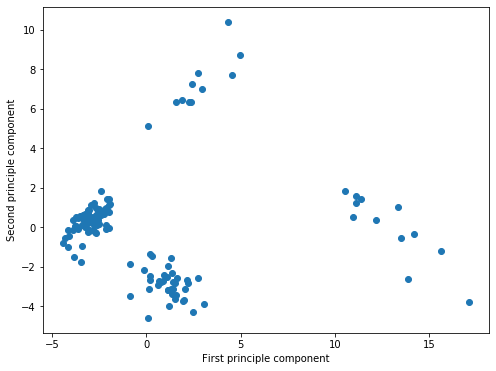

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [93]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(sv_train,tv_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
import statsmodels.regression.linear_model as sm
from sklearn import datasets, linear_model,metrics
#import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = tv_train, exog = sv_train).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                 -0.113
Method:                 Least Squares   F-statistic:                    0.8491
Date:                Fri, 30 Oct 2020   Prob (F-statistic):              0.720
Time:                        16:26:19   Log-Likelihood:                -1605.9
No. Observations:                 102   AIC:                             3350.
Df Residuals:                      33   BIC:                             3531.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
FC              1.123e+06   5.14e+05      2.183      0.036    7.62e+04    2.17e+06
IL              6.972e+05   4.98e+05      1.399      0.171   -3.17e+05    1.71e+06
Adana            1.43e+06   5.45e+05      2.626      0.013    3.22e+05    2.54e+06
Afyonkarahisar -1.062e+07   1.02e+06    -10.411      0.000   -1.27e+07   -8.54e+06
Amasya          9.843e+05      9e+05      1.094      0.282   -8.46e+05    2.81e+06
Ankara          1.823e+05   3.92e+05      0.465      0.645   -6.15e+05     9.8e+05
Antalya         1.375e+06   4.25e+05      3.232      0.003    5.09e+05    2.24e+06
Aydın           1.105e+06   3.11e+05      3.557      0.001    4.73e+05    1.74e+06
Balıkesir      -9.981e+04   6.86e+05     -0.145      0.885    -1.5e+06     1.3e+06
Bolu           -1.062e+07   1.02e+06    -10.411      0.000   -1.27e+07   -8.54e+06
Bursa           1.911e+06   4.54e+05      4.211      0.000    9.88e+05    2.83e+06
Denizli         4.669e+05   3.76e+05      1.243      0.222   -2.97e+05    1.23e+06
Diyarbakır      1.152e+06   5.58e+05      2.066      0.047    1.77e+04    2.29e+06
Edirne          1.459e+06   6.65e+05      2.195      0.035    1.07e+05    2.81e+06
Elazığ          1.105e+06   4.92e+05      2.248      0.031    1.05e+05    2.11e+06
Eskişehir       1.286e+06   4.85e+05      2.649      0.012    2.98e+05    2.27e+06
Gaziantep       1.272e+06    5.6e+05      2.274      0.030    1.34e+05    2.41e+06
Isparta        -1.062e+07   1.02e+06    -10.411      0.000   -1.27e+07   -8.54e+06
Karabük         8.607e+05   3.71e+05      2.321      0.027    1.06e+05    1.62e+06
Kastamonu       8.678e+05   3.14e+05      2.762      0.009    2.29e+05    1.51e+06
Kayseri         1.466e+06    3.8e+05      3.861      0.000    6.94e+05    2.24e+06
Kocaeli        -1.062e+07   1.02e+06    -10.411      0.000   -1.27e+07   -8.54e+06
Konya           1.251e+06   5.39e+05      2.321      0.027    1.54e+05    2.35e+06
Kütahya        -1.062e+07   1.02e+06    -10.411      0.000   -1.27e+07   -8.54e+06
Kırklareli      8.908e+05   3.32e+05      2.682      0.011    2.15e+05    1.57e+06
Muğla           5.762e+05      1e+06      0.576      0.568   -1.46e+06    2.61e+06
Osmaniye        7.325e+05      3e+05      2.441      0.020    1.22e+05    1.34e+06
Sakarya          1.46e+06   3.85e+05      3.791      0.001    6.76e+05    2.24e+06
Samsun          1.703e+06   3.45e+05      4.932      0.000       1e+06    2.41e+06
Tekirdağ        1.599e+06      4e+05      4.001      0.000    7.86e+05    2.41e+06
Tokat           1.546e+06   1.38e+06      1.118      0.271   -1.27e+06    4.36e+06
Trabzon         1.168e+06   4.31e+05      2.708      0.011    2.91e+05    2.05e+06
Uşak             7.19e+05   3.12e+05      2.301      0.028    8.33e+04    1.35e+06
İstanbul        1.284e+06    4.2e+05      3.054      0.004    4.29e+05    2.14e+06
İzmir       

In [80]:
"""from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor, sv_train, tv_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-80-dadbb92958cd>, line 7)

In [ ]:
"""from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

In [ ]:
"""from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)""

<h1 style="color:Red;"> Prediction on 25% split data</h1>

In [94]:
pd.DataFrame({ 'revenue act': tv_test, 'revenue': regressor_OLS.predict(sv_test)}).to_csv('../OUTPUT/revenue -prediction.csv')

In [95]:
pd.DataFrame({ 'revenue act': tv_test, 'revenue': lreg.predict(sv_test)}).to_csv('../OUTPUT/revenue -prediction-lreg.csv')

<h3  style = "color:green;">Evaluation on test data (25 % split data)</h53>

In [96]:
ypred   =   regressor_OLS.predict(sv_test)

After exam only evaluate the paper(model) i.e prediction is evaluated after model buliding(modle building inlcudes prediction)

to find therror patterns in the model

In [97]:
from sklearn.metrics import r2_score
r2 = r2_score(tv_test, ypred)
print('The rsquared value is: ' + str(r2))

The rsquared value is: -751.295573679566


In [98]:
error = tv_train - regressor_OLS.predict(sv_train)

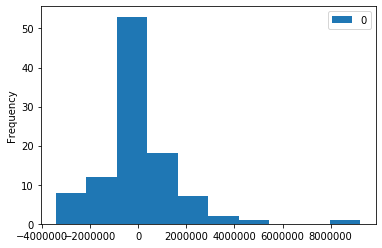

In [99]:
pd.DataFrame(list(error)).plot.hist(bins=10)

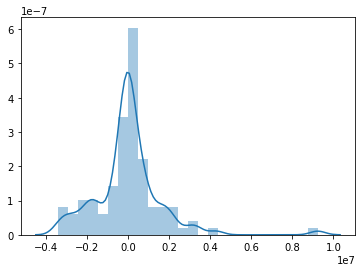

In [100]:
sns.distplot(error)

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
#from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

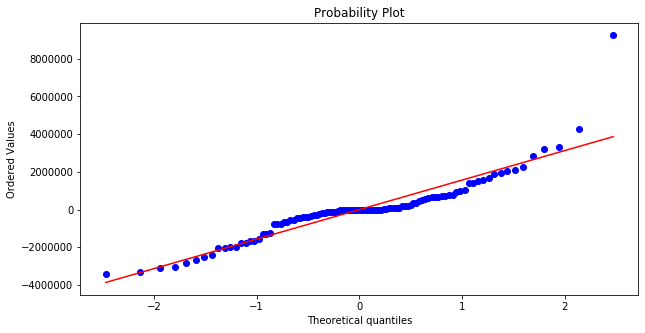

In [102]:
fig, ax = plt.subplots(figsize = (10,5))
_, (__,__,r) = sp.stats.probplot(error, plot = ax, fit = True)
 

NameError: name 'test_error' is not defined

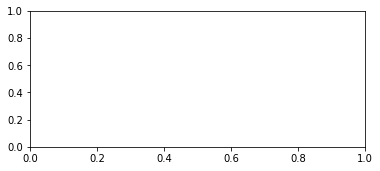

In [103]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(test_error, error)

In [ ]:
print(metrics.mean_absolute_error(tv_test, ypred) )

In [ ]:
#after scaling
print(metrics.mean_squared_error(tv_test, ypred) )

In [ ]:
print(np.sqrt(metrics.mean_squared_error(tv_test, ypred) ))

In [ ]:
 def mean_absolute_percentage_error(tv_test, ypred): 
    tv_test, ypred = np.array(tv_test), np.array(ypred)
    return np.mean(np.abs((tv_test - ypred) / tv_test)) * 100


MAPE = mean_absolute_percentage_error(tv_test, ypred)

In [ ]:
MAPE

In [ ]:
max( tv_test- ypred)

In [ ]:
min( tv_test- ypred)

<h1 style="color:Red;"> Prediction on 25% split data</h1>

In [ ]:
pd.DataFrame({ 'revenue act': tv_train, 'revenue': regressor_OLS.predict(sv_train)}).to_csv('../OUTPUT/revenue-sv_train-prediction.csv')

In [ ]:
pd.DataFrame({ 'revenue act': tv_train, 'revenue': lreg.predict(sv_train)}).to_csv('../OUTPUT/revenue-sv_train-prediction-lreg.csv')

In [ ]:
sc_trainypred   =   regressor_OLS.predict(sv_train)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(tv_train, sc_trainypred)
print('The rsquared value is: ' + str(r2))

<h3 style="color:Green;"> Validation for train 25% data </h3> 

In [ ]:
test_error = tv_test- regressor_OLS.predict(sv_test)

In [ ]:
print(metrics.mean_absolute_error(tv_train, sc_trainypred) )

pd.DataFrame(list(test_error)).plot.hist(bins=10)

#after scaling
print(metrics.mean_squared_error(tv_train, sc_trainypred) )

print(np.sqrt(metrics.mean_squared_error(tv_train, sc_trainypred) ))


In [ ]:
 def mean_absolute_percentage_error(tv_train, sc_trainypred): 
    tv_test, ypred = np.array(tv_train), np.array(sc_trainypred)
    return np.mean(np.abs((tv_train - sc_trainypred) / tv_test)) * 100


MAPE = mean_absolute_percentage_error(tv_train, sc_trainypred)

print('MAPE')

In [ ]:
max(tv_train - sc_trainypred )

In [ ]:
min(tv_train -sc_trainypred)

<h2 style = "color: BLue;"> EDA on TEST DATA SET <h2>

In [ ]:
kaggle_test_data = pd.read_csv("../Data/restaurant-revenue-prediction/test.csv")

In [ ]:
#kaggle_test_data1 = pd.read_csv("../Data/restaurant-revenue-prediction/test.csv")

In [ ]:
kaggle_test_data.head(5)

In [ ]:
kaggle_test_data.describe(include = 'all')

In [ ]:
kaggle_test_data.info()

In [ ]:
kaggle_test_data['Type'].value_counts().plot.bar(title = 'Type')

In [ ]:
(kaggle_test_data['City'].value_counts()/len(kaggle_test_data['City'])*100).plot.bar( figsize = (10,10))


In [ ]:
kaggle_test_data['City Group'].value_counts().plot.bar(title = 'City Group')

In [ ]:
#kaggle_test_data['Open Date'].value_counts().plot.bar(title = 'Open Date')

In [ ]:
#kaggle_test_data  = pd.drop(kaggle_test_data[kaggle_test_data.Type =='DT']) 

In [ ]:
kaggle_test_data.shape

In [ ]:
kaggle_test_data.isnull().sum()

In [ ]:
kaggle_test_data["Open Date"] = pd.to_datetime(kaggle_test_data['Open Date']) 

kaggle_test_data['Open Date'] = kaggle_test_data['Open Date'].astype(np.int64)

In [ ]:
kaggle_test_data.info()

<h5 style:bgcolor="red"> Answer from stackoverflow - to delete rows from a dataframe(df2 = df[(df['TYPE']!='DT') & (df['TYPE']!='MB')])</h5>

In [ ]:
#kaggle_test_data = kaggle_test_data[(kaggle_test_data['Type']!='DT') & (kaggle_test_data['Type']!='MB')]

#res =  res['City'].unique()

kaggle_test_data.describe(include = 'all')

In [ ]:
#kaggle_test_data1['City'] = validCityList

In [ ]:
dummyt1 = pd.get_dummies(kaggle_test_data['City Group'])
kaggle_test_data =  pd.concat([dummyt1, kaggle_test_data], axis =1 )

dummyt2 = pd.get_dummies(kaggle_test_data['City'])
kaggle_test_data =  pd.concat([dummyt2, kaggle_test_data], axis =1 )

dummyt3 = pd.get_dummies(kaggle_test_data['Type'])
kaggle_test_data =  pd.concat([dummyt3, kaggle_test_data], axis =1 )

In [ ]:
kaggle_test_data = kaggle_test_data.drop(['City Group', 'City', 'Type','Id'], axis =1)

kaggle_test_data.info()



In [ ]:
#testMissing
#testAdditional
#testMissing

trainCol = list(sv_train.columns)
testCol = list(kaggle_test_data.columns)

## Train additional columns
testMissing = set(trainCol) - set(testCol)

## Additioncal columns in test
testAdditional = set(testCol) - set(trainCol)

## Adding missing c
for i in testMissing:
    kaggle_test_data[i] = 0



In [ ]:
for i in testAdditional:
    kaggle_test_data = kaggle_test_data.drop(i, axis = 1)


In [ ]:
kaggle_test_data.columns

In [ ]:
submission =  pd.read_csv("../Data/restaurant-revenue-prediction/sampleSubmission.csv")

In [ ]:
Id  = submission['Id']

In [ ]:
pd.DataFrame({ 'Id': Id, 'revenue': lreg.predict(kaggle_test_data)}).to_csv('../OUTPUT/submission.csv')


In [ ]:
ytest_pred   =   regressor_OLS.predict(kaggle_test_data)


In [ ]:
pd.DataFrame({ 'Id': Id, 'revenue': lreg.predict(kaggle_test_data)}).to_csv('../OUTPUT/submission.csv')

In [ ]:
ytest_pred   =   regressor_OLS.predict(kaggle_test_data)

In [ ]:
np.mean(ytest_pred)

---------------------

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=20)
regr.fit(sv_train,tv_train)

RF_Prediction_sv_test = regr.predict(sv_test)


print(metrics.mean_absolute_error(tv_test, RF_Prediction_sv_test) )


In [ ]:
print(metrics.mean_squared_error(tv_test, RF_Prediction_sv_test) )


In [ ]:
print(np.sqrt(metrics.mean_squared_error(tv_test, RF_Prediction_sv_test) ))
  

In [ ]:
def mean_absolute_percentage_error(tv_test, RF_Prediction_sv_test): 
    tv_test, ypred = np.array(tv_test), np.array(RF_Prediction_sv_test)
    return np.mean(np.abs((tv_test - RF_Prediction_sv_test) / tv_test)) * 100


MAPE = mean_absolute_percentage_error(tv_test, RF_Prediction_sv_test)


In [ ]:
MAPE

In [ ]:
max( tv_test- RF_Prediction_sv_test)


In [ ]:
min( tv_test- RF_Prediction_sv_test)

<h1> ////////////////////////////////////</h1>

In [ ]:
RF_Prediction_Kaggledataset = regr.predict(kaggle_test_data)


In [ ]:
pd.DataFrame({ 'Id': Id, 'revenue': regr.predict(kaggle_test_data)}).to_csv('../OUTPUT/RF_Prediction_submission.csv')

In [ ]:
#print(metrics.mean_squared_error(tv_test, RF_Prediction_Kaggledataset) )


In [ ]:
print(np.sqrt(metrics.mean_squared_error(tv_test, RF_Prediction_Kaggledataset) ))
  

In [ ]:
def mean_absolute_percentage_error(tv_test, ypred): 
    tv_test, ypred = np.array(tv_test), np.array(ypred)
    return np.mean(np.abs((tv_test - ypred) / tv_test)) * 100


MAPE = mean_absolute_percentage_error(tv_test, ypred)

In [ ]:

max( tv_test- ypred)
min( tv_test- ypred)a

In [ ]:
trainCol = list(sv_train.columns)

In [ ]:
testCol = list(kaggle_test_data.columns)

In [ ]:
## Train additional columns
testMissing = set(trainCol) - set(testCol)

## Additioncal columns in test
testAdditional = set(testCol) - set(trainCol)

In [ ]:
testMissing

In [ ]:
testAdditional